<p align="right"><i>Data Analysis for the Social Sciences - Part II - YYYY-MM-DD</i></p>

# Week 9 - Univariate Data Analysis

Welcome to Part II of Data Analysis for the Social Sciences. In this lab session we will conduct a range of descriptive analyses of categorical and numeric variables.

We will use real data from the *British Social Attitudes survey, 2019: Poverty and Welfare*, specifically the open dataset available from the UK Data Service: https://doi.org/10.5255/UKDA-SN-8850-1

We will structure our analyses around the following research question:

<p><center><i>Are attitudes to welfare associated with sex, age, interest in politics, and perception of benefits fraud?</i></center></p>

### Aims

This lesson - **Univariate Data Analysis** - has two aims:
1. Demonstrate how to conduct descriptive analyses of categorical and numeric variables individually.
2. Cultivate your computational skills through the use of the statistical programming langauge *R*. For example, there are a number of opportunities for you to amend or write R syntax (code).

### Lesson details

* **Level**: Introductory, for individuals with no prior knowledge or experience of quantitative data analysis.
* **Duration**: 60-75 minutes.
* **Pre-requisites**: None.
* **Programming language**: R.
* **Learning outcomes**:
	1. Understand how to use R for conducting univariate data analysis.
	2. Understand how to select and apply common descriptive analysis techniques for categorical and numeric variables.

## Guide to using this resource

This learning resource was built using <a href="https://jupyter.org/" target=_blank>Jupyter Notebook</a>, an open-source software application that allows you to mix code, results and narrative in a single document. As <a href="https://jupyter4edu.github.io/jupyter-edu-book/" target=_blank>Barba et al. (2019)</a> espouse:
> In a world where every subject matter can have a data-supported treatment, where computational devices are omnipresent and pervasive, the union of natural language and computation creates compelling communication and learning opportunities.

If you are familiar with Jupyter notebooks then skip ahead to the main content (*Quick Recap: Analysing Data*). Otherwise, the following is a quick guide to navigating and interacting with the notebook.

### Interaction

**You only need to execute the code that is contained in sections which are marked by `[]`.**

To execute a cell, click or double-click the cell and press the `Play` button next to the cell or select the `Run` button on the top toolbar (*Runtime > Run the focused cell*); you can also use the keyboard shortcuts `Shift + Enter` or `Ctrl + Enter`).

Try it for yourself:

In [1]:
name <- readline(prompt="Enter name: ")
print(paste("Hi,", name, "enjoy learning more about R and exploring data!"))

Enter name:  Diarmuid


[1] "Hi, Diarmuid enjoy learning more about R and exploring data!"


Notebooks are sequential, meaning code should be executed in order (top to bottom). For example, the following code won't work:

In [2]:
x * 5

ERROR: Error in eval(expr, envir, enclos): object 'x' not found


As the error message suggests, there is no object (variable) called `x`, therefore we cannot do any calculations with it. 

Let's try a sequential approach:

In [3]:
x <- 10 # create an object called 'x' and give it the value '10'

In [4]:
x * 5 # multiply 'x' by 5

[1] 50

### Learn more

Jupyter notebooks provide rich, flexible features for conducting and documenting your data analysis workflow. To learn more about additional notebook features, we recommend working through some of the <a href="https://github.com/darribas/gds19/blob/master/content/labs/lab_00.ipynb" target=_blank>materials</a> provided by Dani Arribas-Bel at the University of Liverpool. 

### Learner input

Throughout the lessons there times when you need to do the following activities:
* **TASK:** A coding task for you to complete (e.g. analyse different variables).
* **QUESTION:** A question regarding your interpretation of some code or a technique (e.g. what is the piece of code doing?).
* **EXERCISE:** A data analysis challenge for you to complete.

## Quick Recap: Analysing Data

Once we have collected and explored our data, we can turn to the interesting part: analysis. Our ultimate aim is to answer the research question accurately: to do so we need to produce summaries of our key variables. In our case we need to analyse variables relating to religious beliefs and sexual attitudes/behaviours. 

How do we know which summaries to choose? We need to look at the **level of measurement** of each variable: are we dealing with categorical (e.g., marital status) or numeric (e.g., income) variables? We covered level of measurement in Part I of the module but here is a quick refresher: 

![Differentiation of numeric and categorical variables](./images/lvl_msr_diagr.png)

Source: [https://maczokni.github.io/MSCD_labs/week2.html#univariate-analysis](https://maczokni.github.io/MSCD_labs/week2.html#univariate-analysis)

**Numeric variables** measure the amount or magnitude of some characteristic / attribute / outcome. For example, how much income a person receives from their part-time job; how many people are classed as homeless in Scotland in a given year. There are two types of numeric variables: *interval* and *ratio*. We don't focus on the differences between the two types in this module, but the following is a useful explainer: [Types of Data: Nominal, Ordinal, Interval/Ratio - Statistics Help](https://youtu.be/hZxnzfnt5v8)

**Categorical variables** measure the presence of some characteristic / attribute / outcome. For example, a person's country of birth; marital status. These are examples of *nominal* categorical variables. However there is another type of categorical variable that also captures the rank or ordering of the categories. For example, a student's degree classification; social class; agreement with a statement ("strongly agree", "agree", "disagree"). These are examples of *ordinal* categorical variables.

The analytical techniques we use depend on whether we are dealing with a numeric or categorical variable. However the aims of our analysis are similar:
1. We want to summarise the **central tendency** of the values
2. We want to summarise the **distribution** of the values

### Central tendency

Central tendency conveys what the *typical observation / case* looks like for a variable (Fogarty, 2019). There are a number of different measures of central tendency but the three most recognisable are:
* **Mode** - the most common value of a variable.
* **Median** - the middle value in a variable's distribution, where an equal number of observations lie above and below this value.
* **Mean** - the average value of a variable. 

We'll clarify what is meant by each of these measures when we encounter some examples in the *British Social Attitudes survey* data.

### Distribution

The pattern of variation in the values of a variable is called a *distribution*. For example, here is the distribution of median (typical) age for all countries in 2015:

![](./images/median-age-2015.png)

We observe that the values of this variable are quite uniformly distributed; that is, each median age is roughly as likely to be observed as any other (with the notable exception of ages < 15 and ages > 45).

Observing the full distribution of values is important but there are also a number of summary statistics that describe interesting features of a distribution. These are called **measures of dispersion** and some of the most commonly encountered are:
* **Minimum** - the lowest value observed
* **Maximum** - the highest value observed
* **Range** - the difference between the minimum and maximum
* **Standard deviation** - the average difference a value is from the mean
* **Variance** - the sum of the differences between the values and the mean

Many of these really only apply to numeric variables.

For example, here are some measures of dispersion of typical ages:

In [5]:
country_ages <- read.csv("https://raw.githubusercontent.com/DiarmuidM/data-analysis-for-the-social-sciences-2023/main/lessons/data/median-age-our-world-in-data.csv", header=TRUE, na="NA")
country_ages_2015 <- country_ages[country_ages$Year==2015,]
summary(country_ages$Age)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  14.30   21.00   31.20   31.93   42.00   56.80 

The lowest typical age is 14 years old (i.e., roughly half of the population are younger, and half older than this age), while the highest typical age is 57 years old.

We observe that the mean age is 32 years old. To decide whether this is a good representation of the typical value for this variable, we calculate the standard deviation:

In [6]:
sd(country_ages$Age)

[1] 11.13444

On average, a country is within 11 years of the mean age. When we consider this statistic in light of the shape of the distribution (see above), we can conclude the typical age varies considerably across countries: there are at least 50 countries with a median age < 20 years old, and at least 40 with a median age > 40 years old.

Therefore the mean and median summary statistics are not very representative of the typical country with regards to age.

## Univariate Data Analysis

As you may have guessed, *uni* variate analysis simply involves the analysis of *one* variable at a time. We may be interested in many variables in our study but we produce summaries of them separately, rather than trying to analyse them jointly (like in a correlation analysis).

One variable, sounds simple right? Well yes, as long as:
* You have variables that measure the concept you are interested in.
* You correctly identify the level of measurement) of each variable.

### Importing data

The first step is to import the *British Social Attitudes survey* data for analysis.

In [7]:
bsa2019 <- read.table("https://raw.githubusercontent.com/DiarmuidM/data-analysis-for-the-social-sciences-2023/main/lessons/data/bsa2019_poverty_open.tab", header=TRUE, na="NA", sep="\t")
head(bsa2019) # view the first six observations

,Sserial,WtFactor,RSex,RAgeCat,eq_inc_quintiles,RClassGp,HEdQual3,Married,ChildHh,skipmeal,⋯,Dole,TaxSpend,MuchPov,Poverty1,Poverty2,NatFrEst,incdiffs,welfare2,leftrigh,libauth
,<int>,<dbl>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>
1,310001,0.9119594,2,6,-1,1,2,1,2,-1,⋯,3,3,8,2,1,5,-1,2.500,2.4,3.500000
2,310002,0.4439626,2,3,5,1,2,2,2,1,⋯,2,3,2,2,2,30,2,3.125,2.0,3.833333
3,310003,1.2182741,2,4,-1,1,3,1,1,-1,⋯,2,2,2,2,2,50,-1,3.125,2.2,4.166667
4,310004,1.5839969,1,2,4,1,2,4,2,-1,⋯,3,3,2,2,1,50,-1,2.250,3.2,2.166667
5,310005,0.4743091,1,6,-1,5,4,4,2,1,⋯,2,3,1,2,1,50,4,3.375,1.6,4.666667
6,310006,1.1363125,1,4,1,3,8,1,1,-1,⋯,2,2,1,1,1,10,-1,2.875,1.8,3.666667


Let's get a list of variable names and see which ones relate to our two main concepts (*religious beliefs* and *sexual attitudes/behaviours*).

In [8]:
names(bsa2019)

[1] "Sserial"          "WtFactor"         "RSex"             "RAgeCat"         
 [5] "eq_inc_quintiles" "RClassGp"         "HEdQual3"         "Married"         
 [9] "ChildHh"          "skipmeal"         "paptype"          "SMNews"          
[13] "PartyId2"         "Politics"         "SocTrust"         "Spend1"          
[17] "Dole"             "TaxSpend"         "MuchPov"          "Poverty1"        
[21] "Poverty2"         "NatFrEst"         "incdiffs"         "welfare2"        
[25] "leftrigh"         "libauth"

After looking up the [codebook](./codebooks/8735_natsal_teaching_codebook_v1.pdf), there are two variables definitely of interest:
* `welfare2` is a measure of how sympathetic a respondent's attitudes to welfare claimants sex are: on a scale of 1-5, higher scores indicate less sympathy. Therefore this is a numeric variable, specifically an interval variable.
* `RSex` is a measure of a respondent's sex. Therefore this is a categorical variable, specifically a nominal variable.

Let's focus on summarising the values of each of these variables.

### Data cleaning

There are a number of important steps that need to be executed before proceeding with the analysis:
* Handling missing values
* Labelling values of categorical variables

We cover these techniques in more detial in a separate notebook: [Data Cleaning](./dass-bsa-data-cleaning.ipynb) 

**Please note that you will be expected to perform these tasks for your own analysis.**

For the `welfare2` variable note the values outwith the expected range of 1-5. We need to tell *R* how to deal with these before proceeding with our analysis. We will tell *R* to treat these values as "missing" i.e., as blank or non-responses.

In [16]:
summary(bsa2019$welfare2)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
  1.000   2.308   2.750   2.731   3.125   5.000     642 

In [11]:
bsa2019$welfare2[bsa2019$welfare2<1 | bsa2019$welfare2>5] <- NA # convert "-1" and "9" to missing

**TASK:** Use the summary command to reinspect the values of the cleaned variable.

In [ ]:
# INSERT CODE HERE

For the `RSex` variable there are no missing values but we should label the values so we do not need to refer to the codebook all of the time.

In [17]:
bsa2019$RSex <- factor(bsa2019$RSex, levels = c(1,2), labels = c("Male", "Female"))

In [18]:
table(bsa2019$RSex)


  Male Female 
  1454   1770 

### Summarising categorical variables

One of the core ways of analysing a categorical variable is to examine the frequency with which each category occurs. That is, we look at the variable's *frequency distribution*. Recall that a *distribution* is a summary of the variation in a variable: that is, observations have different values for a variable and these values form a pattern.

In [19]:
table(bsa2019$RSex)


  Male Female 
  1454   1770 

The `table()` command is pretty basic but does give us some useful information. For instance we learn that there are more female respondents than males (i.e., "Female" is the modal category of this variable).

It would be useful to know the percentage of observations in each category. *R* doesn't make this as easy as we would like but it can be achieved like so:

In [20]:
round(prop.table(table(bsa2019$RSex)) * 100, 0)


  Male Female 
    45     55 

Now we can see that a majority (55%) of respondents are female, even though the percentage is closer to 50% in the general population (perhaps we need to keep this in mind as we progress with our analysis?).

Finally, summarising the distribution of a categorical variable is often best done through a graph or visualisation. A common graph type for categorical variables is a **bar chart**.

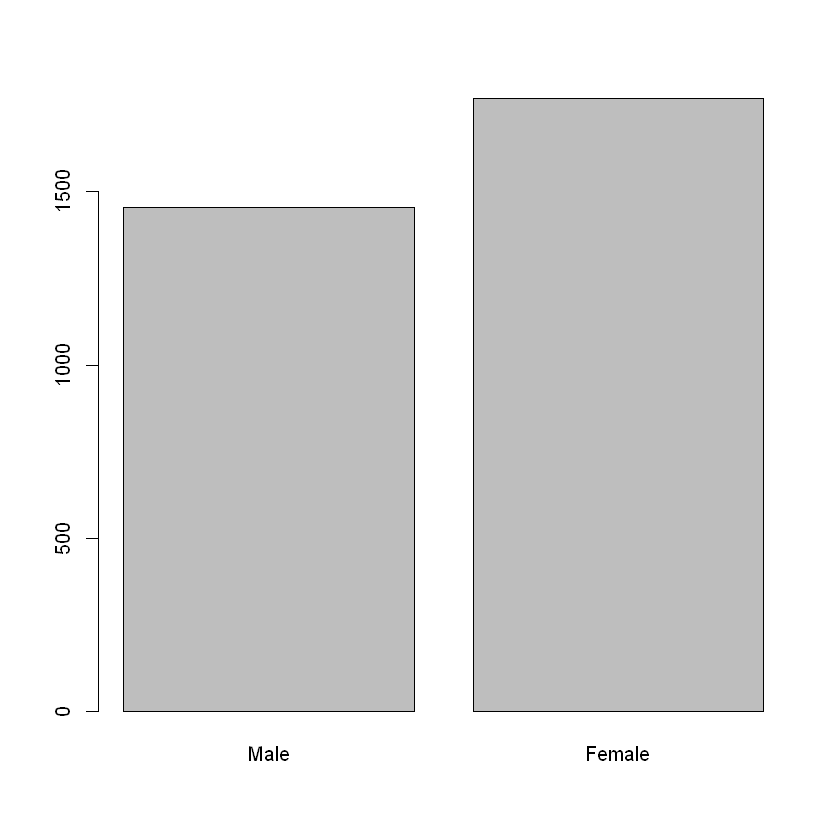

In [21]:
barplot(table(bsa2019$RSex))

We can clearly see the pattern in the distribution using a bar chart as well.

Don't worry about the basic presentation of the graph: we will produce more visually appealing graphs in later weeks.

**TASK:** Use frequency tables and bar charts to summarise the `RAgeCat` and `Married` variables. Make sure you clean these variables first (i.e., deal with missing values, label values).

In [ ]:
# INSERT CODE HERE

### Summarising numeric variables

In [22]:
mean(bsa2019$welfare2, na.rm=TRUE)  # ignore missing values when calculating the mean

[1] 2.731137

In [23]:
median(bsa2019$welfare2, na.rm=TRUE)  # ignore missing values when calculating the median

[1] 2.75

Here we see the mean and median values of the welfare attitude variable. The mean represents the average value of this variable and is calculated by adding up all the values and dividing by the number of observations for this variable.

The median represents the middle value: roughly 50% of respondents have an attitude score less than this value, and 50% have a higher value.

These measures are useful for analysing typical or representative values of variable. However it is also important we consider the distribution of values, so we can assess just *how* useful the mean and median are.

First we can view a summary of the **range** of values of this variable:

In [24]:
summary(bsa2019$welfare2)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
  1.000   2.308   2.750   2.731   3.125   5.000     642 

A common graph type for numeric variables is a **histogram**.

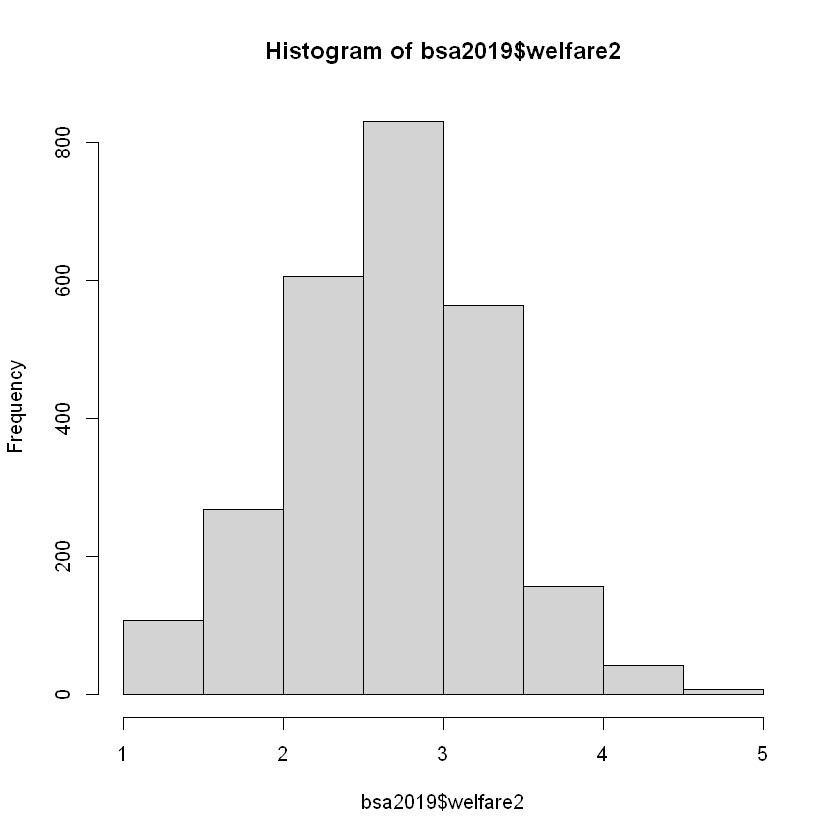

In [27]:
hist(bsa2019$welfare2, breaks = seq(1, 5, by=.5))

We can clearly see the pattern in the distribution using a histogram: most respondents have their first child between the ages of 18 and 28, with a decreasing likelihood of being in your late thirties when having your first child. 

This type of distribution, where the values are bunched to the left, can be described as being **positively skewed**. That is, there are a small number of "extreme" values on the right-hand side of the distribution.

When we have a small range of values for a numeric variable, then a bar chart may also be appropriate:

In [ ]:
barplot(table(natsal$dage1ch))

OK, let's return to our main numeric ariable of interest: `attconservative`

In [ ]:
summary(natsal$attconservative)

In [ ]:
mean(natsal$attconservative, na.rm=TRUE) # ignore missing values when calculating the mean

In [ ]:
median(natsal$attconservative, na.rm=TRUE) # ignore missing values when calculating the mean)

In [ ]:
hist(natsal$attconservative)

The exact values of this variable are not inherently meaningful, they simply represent a scale of how conservative a respondent's attitudes to sex are: postive values of this variable indicate a more conservative attitude to sex, negative values a more liberal attitude. The average respondent is slightly conservative in their attitudes to sex, though most respondents have a score slightly below or above 0.

Let's assess the distribution of this variable using some measures of dispersion:

In [ ]:
summary(natsal$attconservative)

In [ ]:
sd(natsal$attconservative, na.rm=TRUE)

**QUESTION**: How would you describe how representative the mean/median is for this variable? That is, how closely packed are values around these measures?

**TASK**: Use histograms and summary functions (e.g., mean(), summary()) to summarise the `total_wt` variable. Make sure you clean this variable first (if necessary).

In [ ]:
# INSERT CODE HERE

## Conclusion

In this lesson we encountered a range of techniques for summarising categorical and numeric variables one at a time.

In this next lesson we focus on summarising the joint distribution of two variables, a technique known as *bivariate* analysis.